In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [97]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [98]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [99]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [115]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        
    return W

In [122]:
w = np.zeros(4)
w_list = [w.copy()]
errors = []

In [123]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [127]:
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [125]:
for lm in np.linspace(0.0000001, 0.9, 100):
        
    new_w = eval_model_reg2(X_st, y, 1000, alpha=1e-4, lambda_ = lm)
    w_list.append(new_w.copy())
    y_pred = np.dot(new_w, X_st)
    errors.append(calc_mse(y, y_pred))
        
w_list = np.array(w_list)

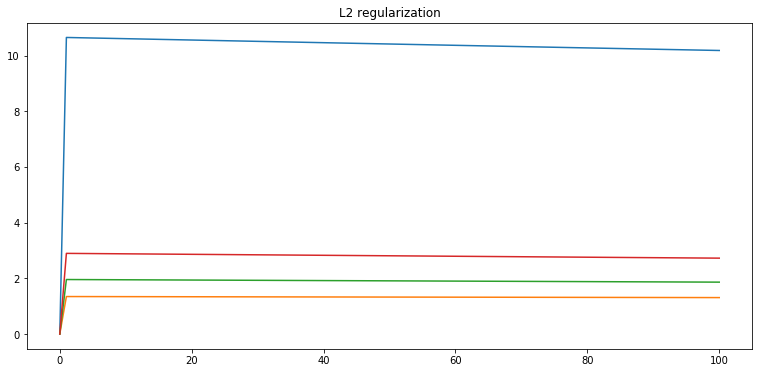

In [126]:
plt.figure(figsize=(13, 6))
plt.title('L2 regularization')

plt.plot(w_list)

plt.show()

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Технически такое возможно, но не представляет практического смысла: нормализация приводит данные к диапазону [0, 1], регуляризация к 0 +- кол-во стандартных отклонений.

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [130]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        
    return W

In [128]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [131]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])